/tmp/ipykernel_6625/712559249.py:20: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Source_x', 'Extract_time_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = pd.merge(


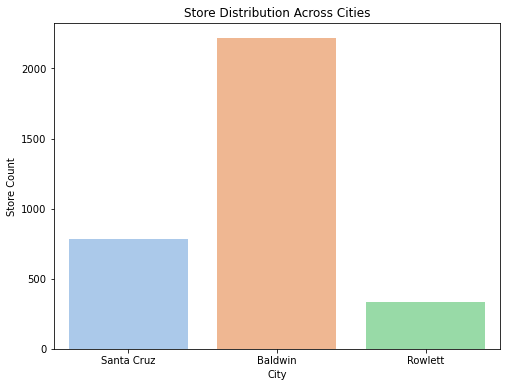

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns


path = "/home/radwa/Radwa.Usecase/Modeling/Information Mart/orders_products_details.csv"

df_orders_products_details = pd.read_csv(path)

path = "/home/radwa/Radwa.Usecase/staging_2/Stores/stores.csv"

df_stores = pd.read_csv(path)


folder_path = "Vizualization"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

df_merged = pd.merge(
    df_orders_products_details,
    df_stores,
    on='store_id',
    how='inner'  
)

plt.figure(figsize=(8, 6))
sns.countplot(x='city', data=df_merged, palette='pastel')
plt.title('Store Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Store Count')
plt.savefig(os.path.join(folder_path, "store_distribution.png"))

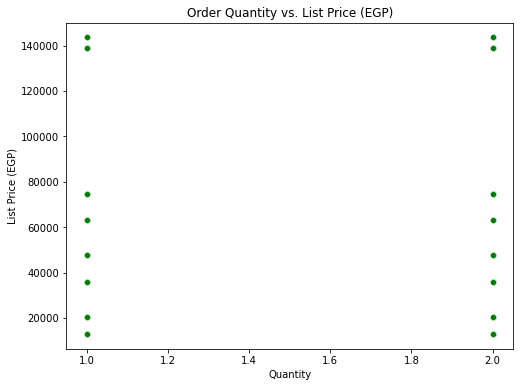

In [4]:
path = "/home/radwa/Radwa.Usecase/Modeling/Information Mart/orders_products_details.csv"

df_orders_products_details = pd.read_csv(path)


folder_path = "Vizualization"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
plt.figure(figsize=(8, 6))
sns.scatterplot(x='quantity', y='list_price_egp', data=df_orders_products_details, color='g')
plt.title('Order Quantity vs. List Price (EGP)')
plt.xlabel('Quantity')
plt.ylabel('List Price (EGP)')
plt.savefig(os.path.join(folder_path, "quantity_vs_price.png"))



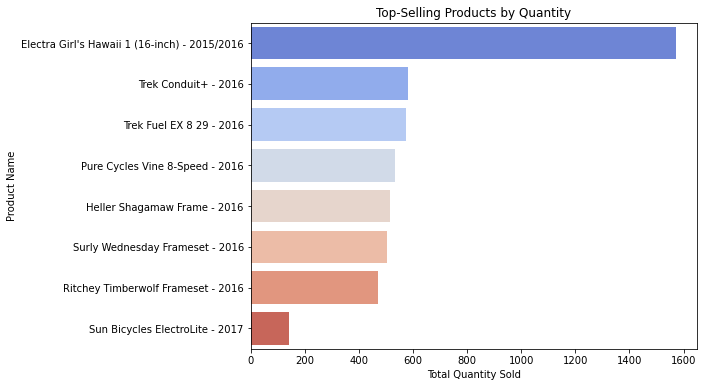

In [5]:
product_sales = df_orders_products_details.groupby('product_name')['quantity'].sum().reset_index()

product_sales = product_sales.sort_values(by='quantity', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='quantity', y='product_name', data=product_sales, palette='coolwarm')
plt.title('Top-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.savefig(os.path.join(folder_path, "top_selling_products.png"))

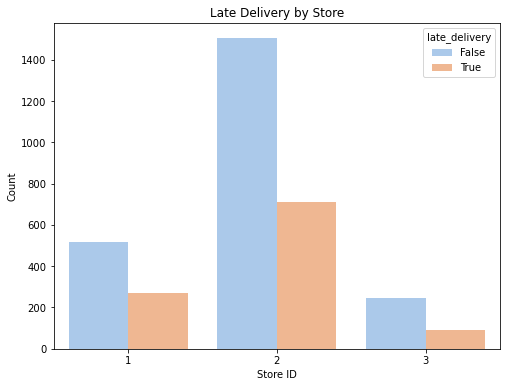

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='store_id', hue='late_delivery', data=df_orders_products_details, palette='pastel')
plt.title('Late Delivery by Store')
plt.xlabel('Store ID')
plt.ylabel('Count')
plt.savefig(os.path.join(folder_path, "late_delivery_by_store.png"))

In [7]:
path = "/home/radwa/Radwa.Usecase/staging_2/Brands/brands.csv"

df_brands = pd.read_csv(path)

/tmp/ipykernel_6625/4191371011.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Source_x', 'Extract_time_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_brands = pd.merge(


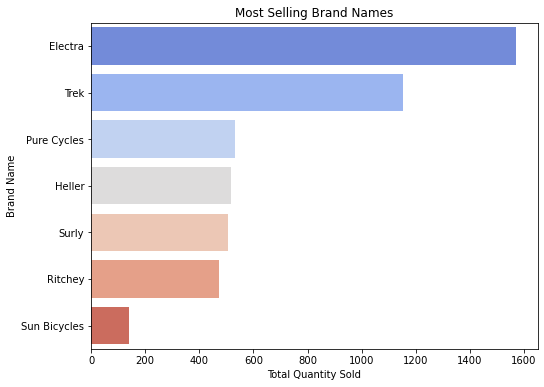

In [8]:
df_merged_brands = pd.merge(
    df_orders_products_details,
    df_brands,
    on='brand_id',
    how='inner' 
)

brand_sales = df_merged_brands.groupby('brand_name')['quantity'].sum().reset_index()

brand_sales = brand_sales.sort_values(by='quantity', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='quantity', y='brand_name', data=brand_sales, palette='coolwarm')
plt.title('Most Selling Brand Names')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Brand Name')
plt.savefig(os.path.join(folder_path, "most_selling_brands.png"))

In [9]:
path = "/home/radwa/Radwa.Usecase/staging_2/Categories/categories.csv"

df_categories = pd.read_csv(path)

/tmp/ipykernel_6625/507893638.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Source_x', 'Extract_time_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_categories = pd.merge(


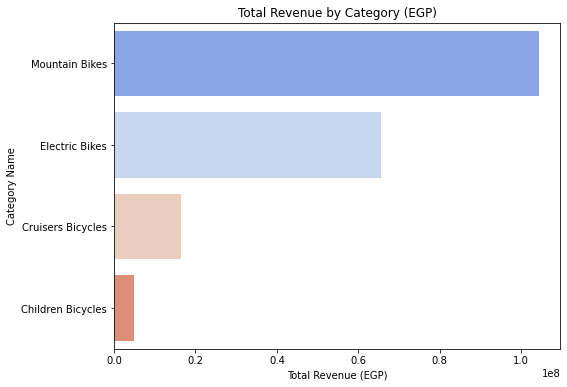

In [10]:
df_merged_categories = pd.merge(
    df_orders_products_details,
    df_categories,
    on='category_id',
    how='inner' 
)
category_revenue = df_merged_categories.groupby('category_name')['list_price_egp'].sum().reset_index()

category_revenue = category_revenue.sort_values(by='list_price_egp', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='list_price_egp', y='category_name', data=category_revenue, palette='coolwarm')
plt.title('Total Revenue by Category (EGP)')
plt.xlabel('Total Revenue (EGP)')
plt.ylabel('Category Name')
plt.savefig(os.path.join(folder_path, "revenue_by_category.png"))


In [11]:
path = "/home/radwa/Radwa.Usecase/staging_2/Staffs/staffs.csv"

df_staffs = pd.read_csv(path)

/tmp/ipykernel_6625/55441849.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Source_x', 'Extract_time_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_staffs = pd.merge(


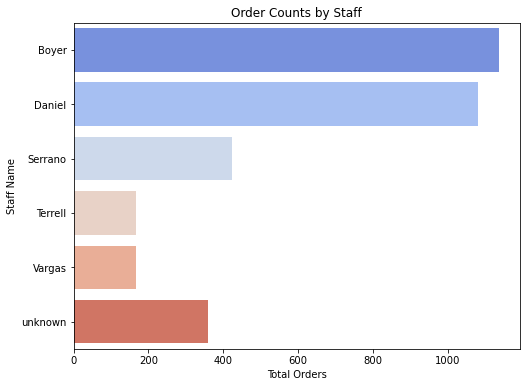

In [12]:
df_merged_staffs = pd.merge(
    df_orders_products_details,
    df_staffs,
    on='staff_id',
    how='inner' 
)

staff_order_count = df_merged_staffs.groupby('last_name')['order_id'].count().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='order_id', y='last_name', data=staff_order_count, palette='coolwarm')
plt.title('Order Counts by Staff')
plt.xlabel('Total Orders')
plt.ylabel('Staff Name')
plt.savefig(os.path.join(folder_path, "order_counts_by_staff.png"))



In [13]:
path = "/home/radwa/Radwa.Usecase/staging_2/status_lookup/status_lookup.csv"

df_status_lookup = pd.read_csv(path)

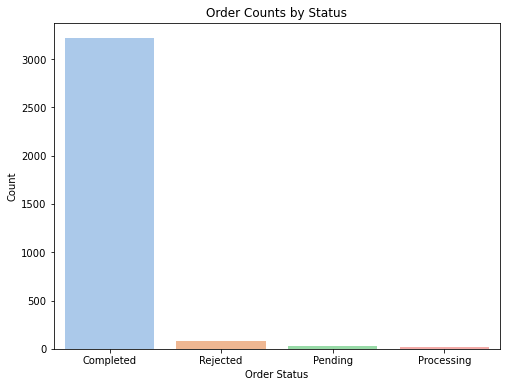

In [16]:
df_merged_status_lookup = pd.merge(
    df_orders_products_details,
    df_status_lookup,
    left_on='order_status', 
    right_on='status_code',  
    how='inner'  
)



plt.figure(figsize=(8, 6))
sns.countplot(x='status_description', data=df_merged_status_lookup, palette='pastel')
plt.title('Order Counts by Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.savefig(os.path.join(folder_path, "order_counts_by_status.png"))




In [17]:
path = "/home/radwa/Radwa.Usecase/staging_2/Stocks/stocks.csv"

df_stocks = pd.read_csv(path)

/tmp/ipykernel_6625/636709546.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Source_y', 'Extract_time_y'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_stocks = pd.merge(


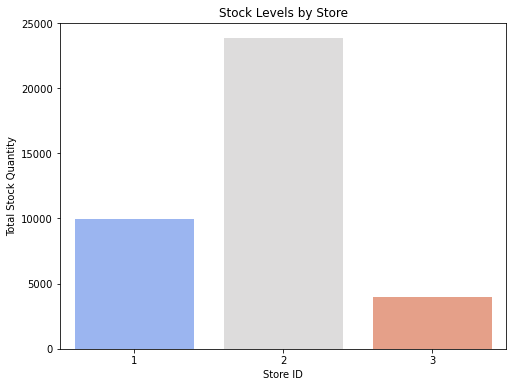

In [18]:
df_merged_stocks = pd.merge(
    df_stocks,
    df_orders_products_details,
    on=['store_id', 'product_id'],
    how='inner' 
)

store_stock_levels = df_merged_stocks.groupby('store_id')['quantity_x'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='store_id', y='quantity_x', data=store_stock_levels, palette='coolwarm')
plt.title('Stock Levels by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Stock Quantity')
plt.savefig(os.path.join(folder_path, "stock_levels_by_store.png"))


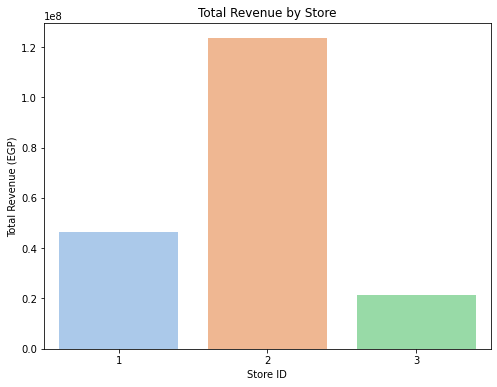

In [19]:
revenue_by_store = df_orders_products_details.groupby('store_id')['list_price_egp'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='store_id', y='list_price_egp', data=revenue_by_store, palette='pastel')
plt.title('Total Revenue by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Revenue (EGP)')
plt.savefig("Vizualization/revenue_by_store.png")


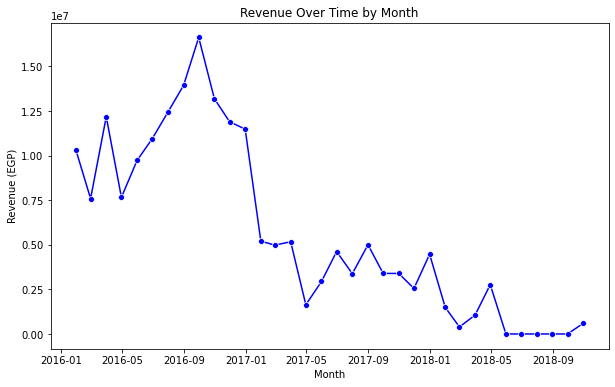

In [20]:
df_orders_products_details['order_date'] = pd.to_datetime(df_orders_products_details['order_date'])

revenue_by_month = df_orders_products_details.groupby(pd.Grouper(key='order_date', freq='M'))['list_price_egp'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_date', y='list_price_egp', data=revenue_by_month, marker='o', linestyle='-', color='b')
plt.title('Revenue Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Revenue (EGP)')
plt.savefig(os.path.join(folder_path, "revenue_over_time_by_month.png"))

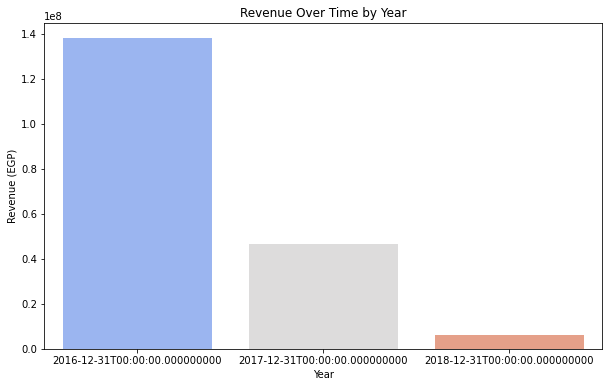

In [23]:
df_orders_products_details['order_date'] = pd.to_datetime(df_orders_products_details['order_date'])


revenue_by_year = df_orders_products_details.groupby(pd.Grouper(key='order_date', freq='Y'))['list_price_egp'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='order_date', y='list_price_egp', data=revenue_by_year, palette='coolwarm')
plt.title('Revenue Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (EGP)')
plt.savefig(os.path.join(folder_path, "revenue_over_time_by_year.png"))